# Data Wrangling (Brain Tumor Classification)

## Step 1: Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import cv2

## Step 2: Inspecting Dataset

In [2]:
# Get the current directory
print(os.getcwd())
print(os.listdir("../Brain_Tumor_Dataset/"))

C:\Users\shaja\Desktop\Springboard Projects\Data-Science-Capstone-Project-Brain-Tumor-Classification-Using-Deep-Learning\Notebooks
['Testing', 'Training']


### I. Checking image file format in training and testing sets

In [3]:
# Checking Image File Format for Training Set

glioma_path = "../Brain_Tumor_Dataset/Training/Glioma/"
notumor_path = "../Brain_Tumor_Dataset/Training/NoTumor/"
pituitary_path = "../Brain_Tumor_Dataset/Training/Pituitary/"
meningioma_path = "../Brain_Tumor_Dataset/Training/Meningioma/"

training_paths = [glioma_path, pituitary_path, meningioma_path, notumor_path]

for path in training_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            print('Other Format Found')
        else:
            continue

In [4]:
# Checking Image File Format for Testing Set

glioma_path = "../Brain_Tumor_Dataset/Testing/Glioma/"
notumor_path = "../Brain_Tumor_Dataset/Testing/NoTumor/"
pituitary_path = "../Brain_Tumor_Dataset/Testing/Pituitary/"
meningioma_path = "../Brain_Tumor_Dataset/Testing/Meningioma/"

Testing_paths = [glioma_path, pituitary_path, meningioma_path, notumor_path]

for path in Testing_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            print('Other Format Found')
        else:
            continue

### II. Visualizing different tumor class and their respective sizes 

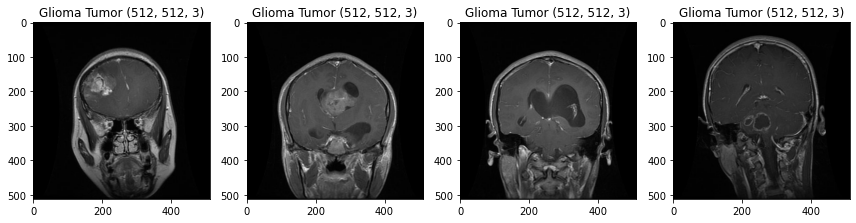

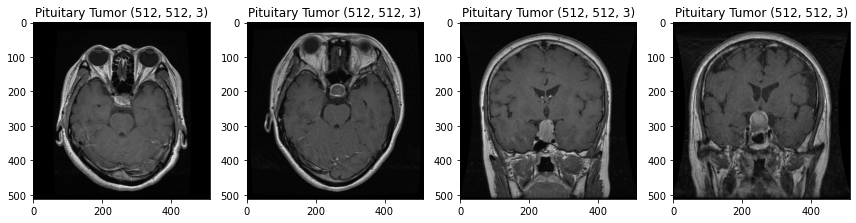

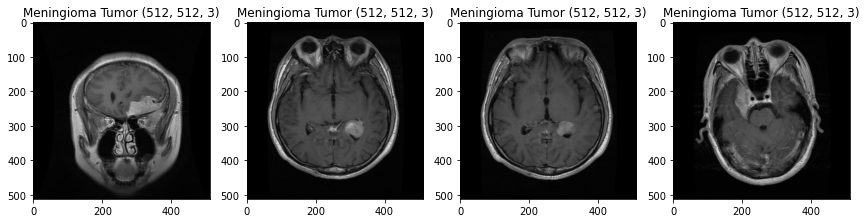

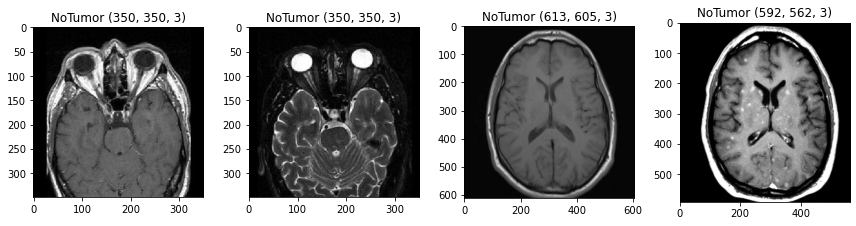

In [5]:
# Visualizing all different tumor types in training dataset and 
# The respective size of the images

glioma_path = "../Brain_Tumor_Dataset/Training/Glioma/"
notumor_path = "../Brain_Tumor_Dataset/Training/NoTumor/"
pituitary_path = "../Brain_Tumor_Dataset/Training/Pituitary/"
meningioma_path = "../Brain_Tumor_Dataset/Training/Meningioma/"

all_paths = [glioma_path, pituitary_path, meningioma_path, notumor_path]

for path in all_paths:
    list_images = os.listdir(path)
    fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,6))
    for i in range(4):
        # plt.figure()
        array = plt.imread(os.path.join(path, list_images[i]))
        ax[i].imshow(array)
        if path.split('/')[-2] == 'NoTumor':
            ax[i].set_title(path.split('/')[-2]+f' {array.shape}')
        else:
            ax[i].set_title(path.split('/')[-2]+' Tumor'+f' {array.shape}')
    fig.tight_layout()

The figures above shows that all the images are RGB and most of them are of size (512,512). Some of the images in NoTumor Class contains different sizes. In that case, I need to resize all of the images to make a unique size.

### III. Inspecting the images in all subfolders

Original image size, (512, 512, 3)


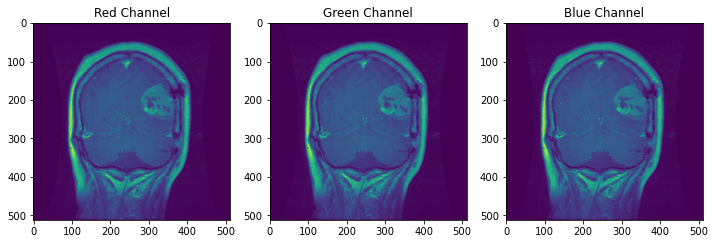

In [6]:
# Visualizing the shape and the channels or dimensions of the images
from skimage import color
glioma_path = "../Brain_Tumor_Dataset/Training/Glioma/"
array = plt.imread(glioma_path+'Tr-gl_0021.jpg')
print(f'Original image size, {array.shape}')
red = array[:,:,0]
green = array[:,:,1]
blue = array[:,:,2]
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4))
ax[0].imshow(red)
ax[0].set_title('Red Channel')
ax[1].imshow(green)
ax[1].set_title('Green Channel')
ax[2].imshow(blue)
ax[2].set_title('Blue Channel')
plt.show()
fig.tight_layout()

In [7]:
array.shape

(512, 512, 3)

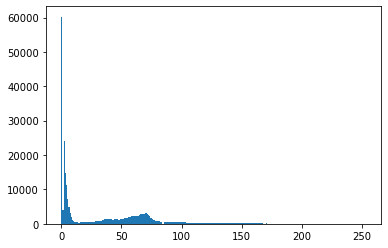

In [8]:
# Visualizing the histogram of an image
plt.hist(red.ravel(), bins=256)
plt.show()

Shape: (512, 512)


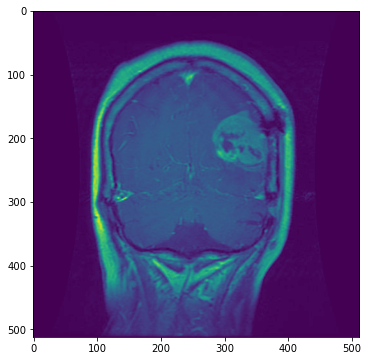

In [9]:
# The gray scale of the RGB images
plt.figure(figsize=(6,6))
gray_image = color.rgb2gray(array)
print("Shape:", gray_image.shape)
plt.imshow(gray_image)

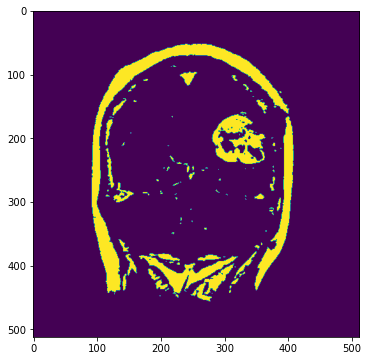

In [10]:
# Trying to manually segment and visualize the tumor area inside the head
plt.figure(figsize=(6,6))
# plt.imshow(gray>0.37)
# plt.imshow(array)
plt.imshow(array[:,:,0]>90)

### IV. Checking the shape of the images in each training and testing subfolders

In [11]:
# Checking the image shape of each training subfolders before cropping and resizing

glioma_path = "../Brain_Tumor_Dataset/Training/Glioma/"
notumor_path = "../Brain_Tumor_Dataset/Training/NoTumor/"
pituitary_path = "../Brain_Tumor_Dataset/Training/Pituitary/"
meningioma_path = "../Brain_Tumor_Dataset/Training/Meningioma/"

training_paths = [glioma_path, pituitary_path, meningioma_path, notumor_path]
base_HW = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0
for path in training_paths:
    for img_name in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        #height = img_array.shape[0]
        #width = img_array.shape[1]
        if (height == base_HW) and (width == base_HW) and (channel == 3):
            break
        elif (channel != 3):
            print('Not RGB Image')
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            print(f"Min HXW {os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            print(f"Max HXW {os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
print(f"Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")

Min HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-noTr_0000.jpg
Max HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-noTr_0002.jpg
Max HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-noTr_0005.jpg
Min HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-noTr_0007.jpg
Min HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-noTr_0009.jpg
Min HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-no_0010.jpg
Min HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-no_0020.jpg
Max HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-no_0021.jpg
Min HXW ../Brain_Tumor_Dataset/Training/NoTumor/Tr-no_0026.jpg
Count: 9 
Min Height: 225, Min Width: 225       
Max Height: 830, Max Width 1024


By inspecting the shape of the images in different training sub folders its visible that there is no gray scale images other than RGB. Also, the height and width of all the images except NoTumor class has shape of (512, 512). The number of images that contain different shape is 9. So, We need to resize the images in NoTumor subfolders.

In [12]:
# Checking the image shape of each testing subfolders before cropping and resizing

glioma_path = "../Brain_Tumor_Dataset/Testing/Glioma/"
notumor_path = "../Brain_Tumor_Dataset/Testing/NoTumor/"
pituitary_path = "../Brain_Tumor_Dataset/Testing/Pituitary/"
meningioma_path = "../Brain_Tumor_Dataset/Testing/Meningioma/"

Testing_paths = [glioma_path, pituitary_path, meningioma_path, notumor_path]
base_hw = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0
for path in Testing_paths:
    for img_name in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        #height = img_array.shape[0]
        #width = img_array.shape[1]
        if (height == base_hw) and (width == base_hw) and (channel == 3):
            break
        elif (channel != 3):
            print('Not RGB Image')
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            print(f"Min HXW {os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            print(f"Max HXW {os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
print(f"Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")

Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0000.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0001.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0002.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0003.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0004.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0006.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0008.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-meTr_0009.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0011.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0012.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0014.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0015.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0017.jpg
Max HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0018.jpg
Min HXW ../Brain_Tumor_Dataset/Testing/Meningioma/Te-me_0022.jpg
Max HXW .

By inspecting the shape of the images in different testing sub folders its visible that there is no gray scale images other than RGB. Also, the height and width of images in some folder contains different shape other than (512, 512). The number of images that contain different shape is 130. So, We need to resize the images in respective subfolders (Meningioma and NoTumor subfolders).

### V. Cropping and resizing required images

In [13]:
# Resizing an saving the training images (NoTumor) in same folder with same file name

notumor_path = "../Brain_Tumor_Dataset/Training/NoTumor/"

import PIL
import os
import os.path
from PIL import Image

for file in os.listdir(notumor_path):
    f_img = notumor_path+file
    img = Image.open(f_img)
    try:
        img = img.resize((512,512), PIL.Image.ANTIALIAS)
        img.save(f_img)
    except:
        pass

In [14]:
# Resizing an saving the testing images (Meningioma) in same folder with same file name

meningioma_path = "../Brain_Tumor_Dataset/Testing/Meningioma/"

import PIL
import os
import os.path
from PIL import Image

for file in os.listdir(meningioma_path):
    f_img = meningioma_path+file
    img = Image.open(f_img)
    try:
        img = img.resize((512,512), PIL.Image.ANTIALIAS)
        img.save(f_img)
    except:
        pass

In [15]:
# Resizing an saving the testing images (NoTumor) in same folder with same file name

notumor_path = "../Brain_Tumor_Dataset/Testing/NoTumor/"

import PIL
import os
import os.path
from PIL import Image

for file in os.listdir(notumor_path):
    f_img = notumor_path+file
    img = Image.open(f_img)
    try:
        img = img.resize((512,512), PIL.Image.ANTIALIAS)
        img.save(f_img)
    except:
        pass

In [16]:
# Cropping an Image
"""
import PIL
from PIL import Image 
 
img = Image.open(glioma_path+'Tr-gl_0021.jpg') 

left = 77
top = 45
right = 420
bottom = 500

img_res = img.crop((left, top, right, bottom)) 

new_img = img_res.resize((512,512), PIL.Image.ANTIALIAS)
new_img.show() 

"""

"\nimport PIL\nfrom PIL import Image \n \nimg = Image.open(glioma_path+'Tr-gl_0021.jpg') \n\nleft = 77\ntop = 45\nright = 420\nbottom = 500\n\nimg_res = img.crop((left, top, right, bottom)) \n\nnew_img = img_res.resize((512,512), PIL.Image.ANTIALIAS)\nnew_img.show() \n\n"

In [19]:
deff

NameError: name 'deff' is not defined

### Examples

In [ ]:
# In case you want to keep the same aspect ratio of the image you can use this script.
from PIL import Image
import os, sys

path = "/path/images/"
dirs = os.listdir( path )
final_size = 244;

def resize_aspect_fit():
    for item in dirs:
         if item == '.DS_Store':
             continue
         if os.path.isfile(path+item):
             im = Image.open(path+item)
             f, e = os.path.splitext(path+item)
             size = im.size
             ratio = float(final_size) / max(size)
             new_image_size = tuple([int(x*ratio) for x in size])
             im = im.resize(new_image_size, Image.ANTIALIAS)
             new_im = Image.new("RGB", (final_size, final_size))
             new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
             new_im.save(f + 'resized.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [ ]:
from PIL import Image
import glob
import os

# new folder path (may need to alter for Windows OS)
# change path to your path
ORI_PATH = '..\DATA\ORI-DIR'
NEW_SIZE = 224
PATH = '..\DATA\NEW-RESIZED-DIR' #the path where to save resized images

# create new folder
if not os.path.exists(PATH):
    os.makedirs(PATH)

# loop over existing images and resize
# change path to your path
for filename in glob.glob(ORI_PATH+'**/*.jpg'): #path of raw images with is subdirectory
    img = Image.open(filename).resize((NEW_SIZE,NEW_SIZE))
    
    # get the original location and find its subdir
    loc = os.path.split(filename)[0]
    subdir = loc.split('\\')[1]
    
    # assembly with its full new directory
    fullnew_subdir = PATH+"/"+subdir
    name = os.path.split(filename)[1]
    
    # check if the subdir is already created or not
    if not os.path.exists(fullnew_subdir):
        os.makedirs(fullnew_subdir)